#Project: Video Game Sales Analysis - Grouping & Aggregation

After Completition You have to mail Project on gagan@samatrix.io.

### Context

Video games creation is essentially a software development process. Generally, publishers such as EA Sports, Atari, Rockstar Games etc. fund the game development process. However, for publishers, it is very important to estimate the cost of development of a video game. Most of the commercial games do not generate adequate profit.

A video game is an interactive visual story. A new game must provide novelty and must be a product of innovation. Nevertheless, once the companies become financially stable by making sufficient profits, they may expand to develop newer games or sequels to the initial ones such as FIFA, Call of Duty, Age of Empires etc.

An average development budget for a multiplatform (PC, PS, Xbox etc.) game is US \$18 to 28 million, with high-profile games often exceeding US $40 million.



---

### Problem Statement

Imagine that you work for one of the world's biggest tech giants as a data analyst. The company intends to venture into the video game development business by either creating their own video games and gaming platforms or by funding a group of individual game developers.

As a part of market research, your CEO wants to come up with a business strategy to enable your company to enter into the video game development business. However, in the best interest of companies financial investment in this project, it is important to know whether there are enough buyers, in the long run, do the number of buyers increase so that they stay invested in this project.

Your CEO would like to know what kind of games are most popular in terms of the most units sold, what are the most commonly used gaming platforms such as PS4, Xbox, PC etc.

---

---

### Dataset Description

You are provided with a video games sales dataset. It consists of the following features:

1. `Rank` - Rank based on the number of units sold of a game. The most sold game is ranked 1.

2. `Name` - The name of a video game.

3. `Platform` - The platform (PC, PS4, XBox etc.) for which a game is released.

4. `Year` - The release year of a video game.

5. `Genre` - The genre of a video game.

6. `Publisher` - The publisher of a video game.

7. `NA_Sales` - Approximately, the total number of units sold (in million) of a video game in North America.

8. `EU_Sales` - Approximately, the total number of units sold (in million) of a video game in Europe.

9. `JP_Sales` - Approximately, the total number of units sold (in million) of a video game in Japan.

10. `Other_Sales` - Approximately, the total number of units sold (in million) of a video game in the rest of the world.

11. `Global_Sales` - Approximately, the total number of units sold (in million) of a video game all over the world.

---

### Things To Do

- The `Year` and `Publisher` columns contain few missing values. Treat them accordingly.

- Convert the values contained in the `Year` column into integer values.

- Find out:

  1. The trend of growth in the number of total units sold across the given regions and the world. Also create year-wise line plots for the total number of units sold across different regions and the world.
  
  2. Top 10 most sold genres of video games but at least 100 million units sold globally. Also create genre-wise line plots for the total number of units sold across different regions and the world.

  3. Top 10 best publishers of video games but at least 100 million units sold globally.
  
  4. Top 10 most commonly used gaming platform but at least 100 million units sold globally.

---

#### 1. Import Modules & Load Data

In [1]:

# Importing the modules and loading the dataset.
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv(r'C:\Users\victus\OneDrive\Documents\Data for Project 1 (1).csv')

In [3]:
data

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


Get the counts of Non-Null values and the datatype of each column.

In [4]:
# Get the dataset information using the 'info()' function.

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


---

#### 2. Treat Null Values

In most of the cases, we do not get complete datasets. They either have some values missing from the rows and columns or they do not have standardised values.

For example: If there is a date column in a dataset, then there is a huge chance that some of the dates are entered in the `DD-MM-YYYY` format, some in the `MM-DD-YYYY` format and so on.

So, before going ahead with the analysis, it is a good idea to check whether the dataset has any missing values.

In [5]:
# Check for the null values in all the columns using 'df.isnull().sum()'.

data.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

**Q:** Which of the columns are having null values?

**A:** The following columns contain null values in them: Year, Publisher

In [6]:
# Remove the rows/columns containing the null values .

df=data.dropna()

In [7]:
df.isnull().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [8]:
# Convert the data-type of the year values into integer values.

year={'Year':int}
df=df.astype(year)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16291 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16291 non-null  int64  
 1   Name          16291 non-null  object 
 2   Platform      16291 non-null  object 
 3   Year          16291 non-null  int32  
 4   Genre         16291 non-null  object 
 5   Publisher     16291 non-null  object 
 6   NA_Sales      16291 non-null  float64
 7   EU_Sales      16291 non-null  float64
 8   JP_Sales      16291 non-null  float64
 9   Other_Sales   16291 non-null  float64
 10  Global_Sales  16291 non-null  float64
dtypes: float64(5), int32(1), int64(1), object(4)
memory usage: 1.4+ MB


---

#### 3. Yearly Total Units Sold

Here you need to get the year wise sales of video games from the following columns:

 - `NA_Sales`
 -`EU_Sales`
 -`JP_Sales`
 -`Other_sales`
 -`Global_Sales`




In [47]:
# Find out the total number of units sold yearly across different regions and the world.
# store the number of units sold yearly in a variable (let's say 'group_year').

# Get the total units sold yearly from last 5 columns.

group_year=df.groupby(by=['Year'])[['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales']].sum()
group_year

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Year,,,,,
1980,10.59,0.67,0.00,0.12,11.38
1981,33.40,1.96,0.00,0.32,35.77
1982,26.92,1.65,0.00,0.31,28.86
1983,7.76,0.80,8.10,0.14,16.79
1984,33.28,2.10,14.27,0.70,50.36
1985,33.73,4.74,14.56,0.92,53.94
1986,12.50,2.84,19.81,1.93,37.07
1987,8.46,1.41,11.63,0.20,21.74
1988,23.87,6.59,15.76,0.99,47.22


In [11]:
# Create the line plots for the total number of units sold yearly across different regions and the world.

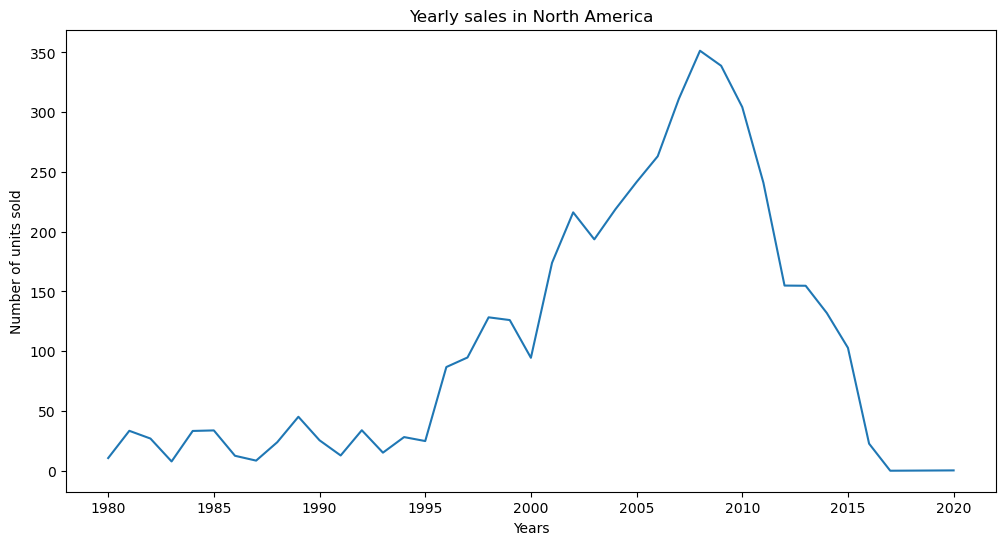

In [52]:
plt.figure(figsize=(12,6))
plt.plot(group_year['NA_Sales'])
plt.xlabel('Years')
plt.ylabel('Number of units sold')
plt.title('Yearly sales in North America')
plt.show()

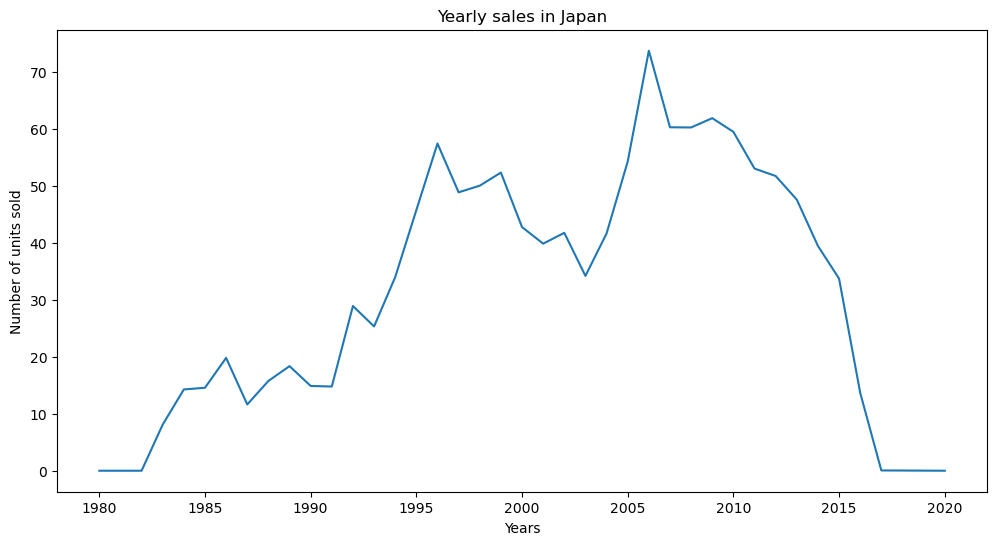

In [51]:
plt.figure(figsize=(12,6))
plt.plot(group_year['JP_Sales'])
plt.xlabel('Years')
plt.ylabel('Number of units sold')
plt.title('Yearly sales in Japan')
plt.show()

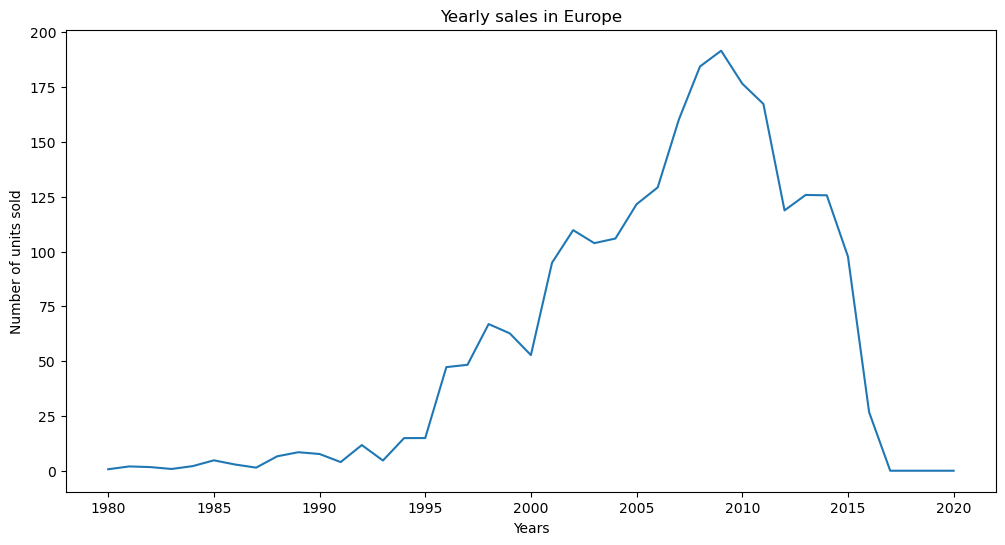

In [50]:
plt.figure(figsize=(12,6))
plt.plot(group_year['EU_Sales'])
plt.xlabel('Years')
plt.ylabel('Number of units sold')
plt.title('Yearly sales in Europe')
plt.show()

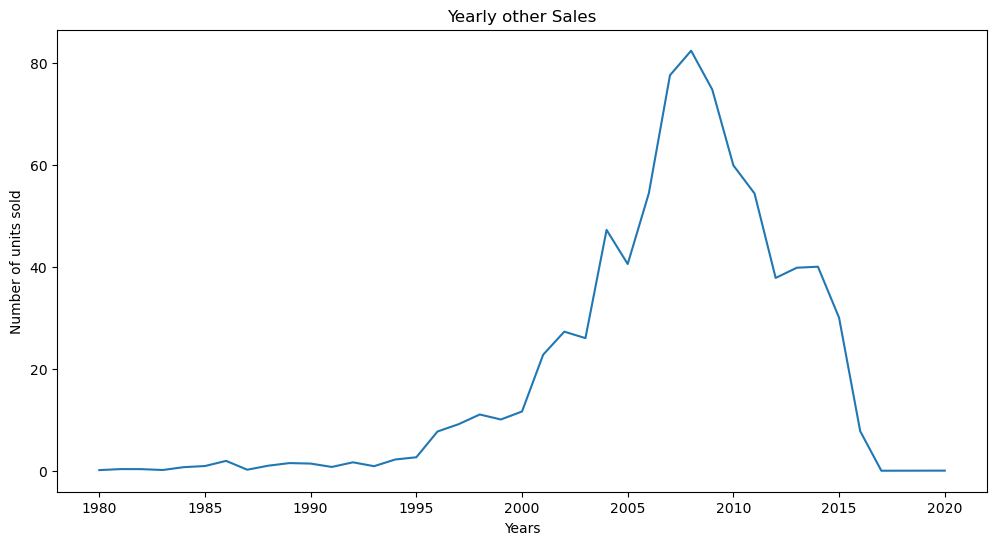

In [49]:
plt.figure(figsize=(12,6))
plt.plot(group_year['Other_Sales'])
plt.xlabel('Years')
plt.ylabel('Number of units sold')
plt.title('Yearly other Sales')
plt.show()

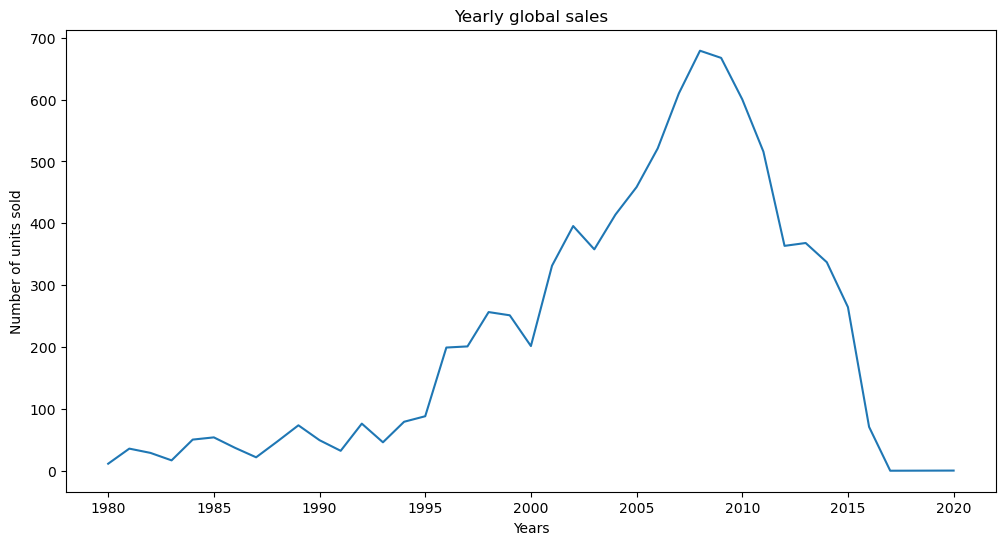

In [48]:
plt.figure(figsize=(12,6))
plt.plot(group_year['Global_Sales'])
plt.xlabel('Years')
plt.ylabel('Number of units sold')
plt.title('Yearly global sales')
plt.show()

In [17]:
# In which year, the most number of games were sold global

In [18]:
group_year['Global_Sales'].max()

678.9

In [19]:
group_year['Global_Sales']==678.9

Year
1980    False
1981    False
1982    False
1983    False
1984    False
1985    False
1986    False
1987    False
1988    False
1989    False
1990    False
1991    False
1992    False
1993    False
1994    False
1995    False
1996    False
1997    False
1998    False
1999    False
2000    False
2001    False
2002    False
2003    False
2004    False
2005    False
2006    False
2007    False
2008     True
2009    False
2010    False
2011    False
2012    False
2013    False
2014    False
2015    False
2016    False
2017    False
2020    False
Name: Global_Sales, dtype: bool

**Q:** In which year, the most number of games were sold globally and how many?

**A:** The most number of games were sold in the year 2008. A total of 678.9 million gameas were sold in the particular year globally.

---

#### 4. Genre-wise Total Units Sold

We perform the following tasks to get an idea of which type of video game is most popular globally.

The video games are classified into following Genre:

 - Action

 - Adventure

 - Fighting

 - Misc

 - Platform

 - Puzzle

 - Racing

 - Role-Playing

 - Shooter

 - Simulation

You need to group the Dataframe by `Genre`.

In [21]:
# Create line plots for genre-wise total number of units sold across different regions and the world

In [26]:
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [29]:
group_genre=df.groupby(by=['Genre'])[['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales']].sum()
group_genre

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Genre,,,,,
Action,861.77,516.48,158.65,184.92,1722.84
Adventure,101.93,63.74,51.99,16.70,234.59
Fighting,220.74,100.00,87.15,36.19,444.05
Misc,396.92,211.77,106.67,73.92,789.87
Platform,445.99,200.65,130.65,51.51,829.13
Puzzle,122.01,50.52,56.68,12.47,242.21
Racing,356.93,236.31,56.61,76.68,726.76
Role-Playing,326.50,187.57,350.29,59.38,923.83
Shooter,575.16,310.45,38.18,101.90,1026.20


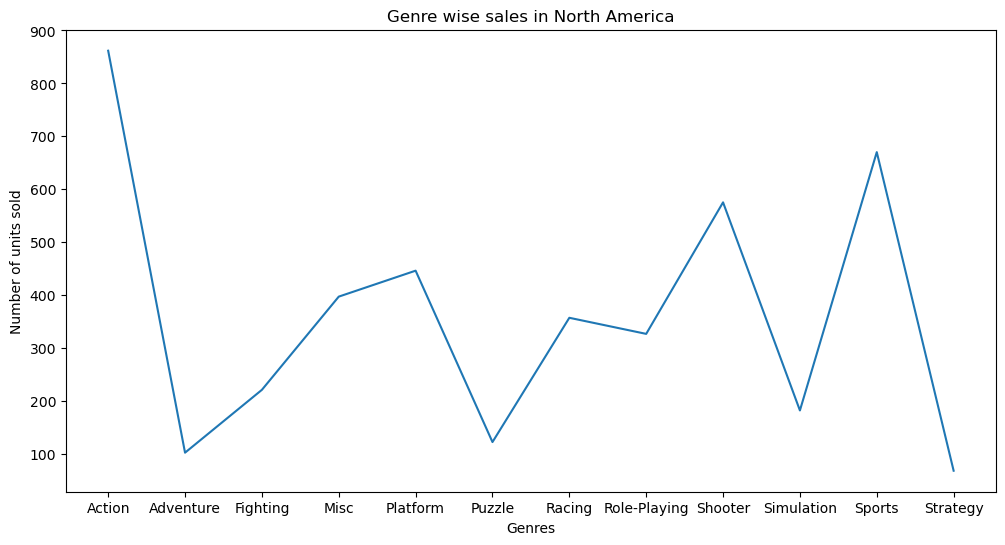

In [38]:
plt.figure(figsize=(12,6))
plt.plot(group_genre['NA_Sales'])
plt.xlabel('Genres')
plt.ylabel('Number of units sold')
plt.title('Genre wise sales in North America')
plt.show()

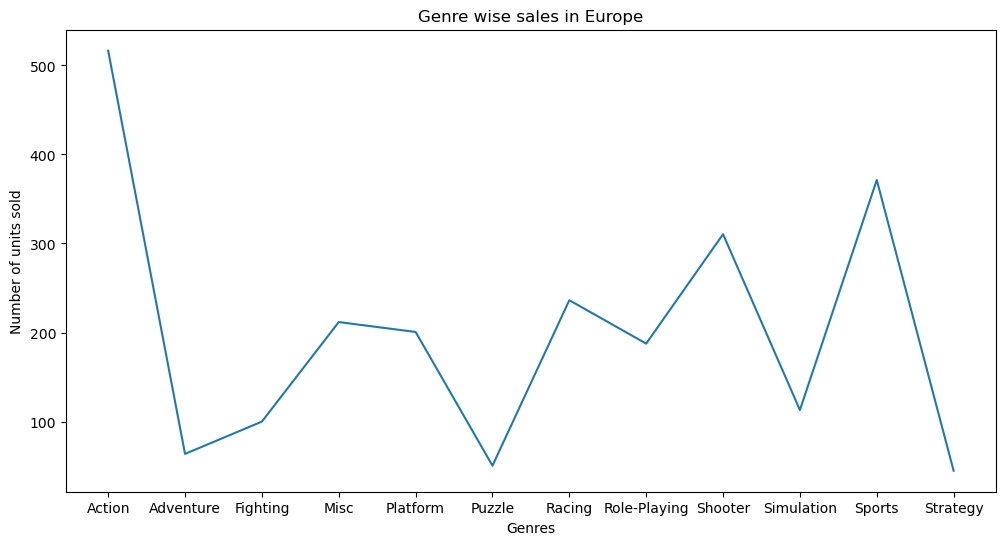

In [39]:
plt.figure(figsize=(12,6))
plt.plot(group_genre['EU_Sales'])
plt.xlabel('Genres')
plt.ylabel('Number of units sold')
plt.title('Genre wise sales in Europe')
plt.show()

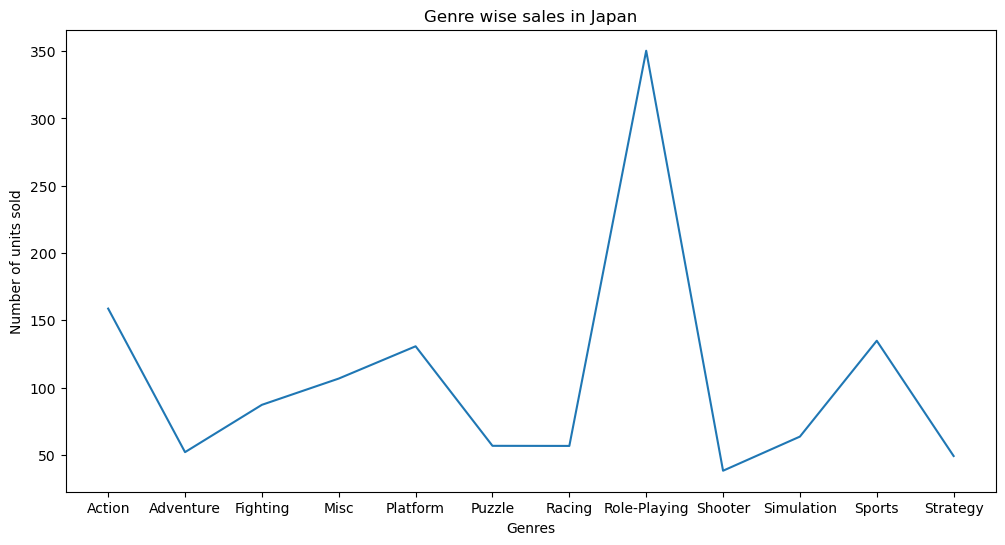

In [40]:
plt.figure(figsize=(12,6))
plt.plot(group_genre['JP_Sales'])
plt.xlabel('Genres')
plt.ylabel('Number of units sold')
plt.title('Genre wise sales in Japan')
plt.show()

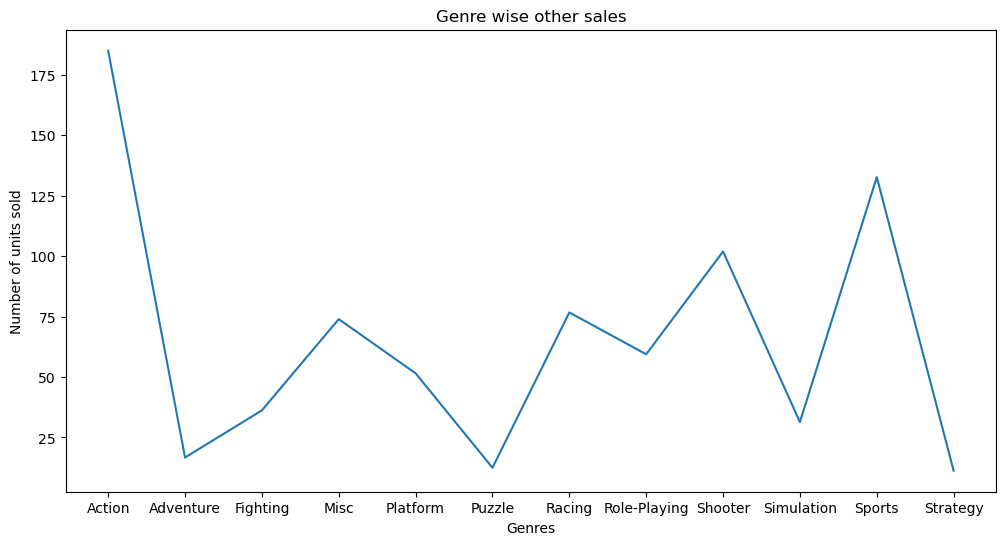

In [42]:
plt.figure(figsize=(12,6))
plt.plot(group_genre['Other_Sales'])
plt.xlabel('Genres')
plt.ylabel('Number of units sold')
plt.title('Genre wise other sales')
plt.show()

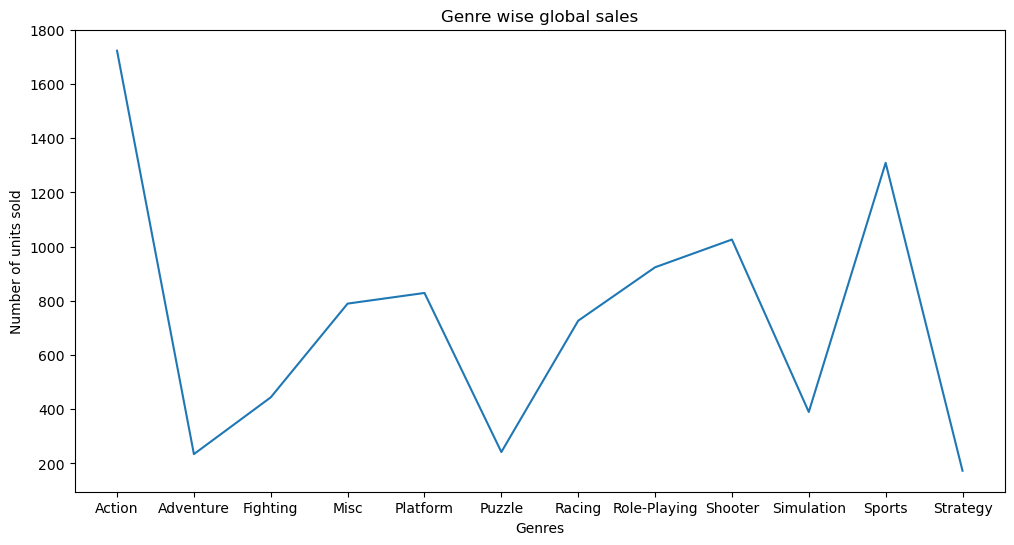

In [43]:
plt.figure(figsize=(12,6))
plt.plot(group_genre['Global_Sales'])
plt.xlabel('Genres')
plt.ylabel('Number of units sold')
plt.title('Genre wise global sales')
plt.show()

**Q:** What genre of video game is most popular in Japan in terms of the total number of units sold? Also, provide the total number of units sold in Japan for that genre.

**A:** The genre role-playing is teh most popular in Japan in terms of the total number of the units sold. A total 350.29 million of units were sold in Japan of that genre between 1980 to 2020.

In [22]:
# What genre of video game is most popular in Japan in terms of the total number of units sold?

In [44]:
group_genre['JP_Sales'].max()

350.29

In [45]:
group_genre['JP_Sales']==350.29

Genre
Action          False
Adventure       False
Fighting        False
Misc            False
Platform        False
Puzzle          False
Racing          False
Role-Playing     True
Shooter         False
Simulation      False
Sports          False
Strategy        False
Name: JP_Sales, dtype: bool

In [23]:
# Genre-wise total number of units sold across different regions and the world in descending order.
 # Get the total units sold from last 5 columns.
# Sort the values in descending order

In [56]:
group_genre.sort_values(by='Global_Sales',ascending =False)

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Genre,,,,,
Action,861.77,516.48,158.65,184.92,1722.84
Sports,670.09,371.34,134.76,132.65,1309.24
Shooter,575.16,310.45,38.18,101.90,1026.20
Role-Playing,326.50,187.57,350.29,59.38,923.83
Platform,445.99,200.65,130.65,51.51,829.13
Misc,396.92,211.77,106.67,73.92,789.87
Racing,356.93,236.31,56.61,76.68,726.76
Fighting,220.74,100.00,87.15,36.19,444.05
Simulation,181.78,113.02,63.54,31.36,389.98


In the above code,

- We have passed the `Global_Sales` column inside the `by` attribute of the `sort_values()` function to sort the Genre-wise total number of units sold across the world in ascending order.

- To sort values in descending order, set the `ascending` attribute of the `sort_values()` function to `False`.  

**Q:** Which genre of the video games sells the most globally and how much?

**A:** The Action genre of the video games sells the most globally. A total of 1722.84 million units of that genre are sold globally between 1980 to 2020. 

---

#### 5. Publisher-wise Total Units Sold

We perform the following task to get an idea of which publisher of video game has the most number of sales.

We have the following popular video game Publishers:

 - Nintendo

 - Electronic Arts

 - Activision

 - Sony Computer Entertainment

 - Ubisoft

 - Take-Two Interactive

 - THQ

 - Konami Digital Entertainment

 - Sega

 - Namco Bandai Games

You need to group the Dataframe by `Publisher`.

In [64]:
# Publisher-wise total number of units sold across different regions and the world in descending order.
 # Get the total units sold from last 5 columns.
# Sort the values in descending order

group_pub=df.groupby(by=['Publisher'])[['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales']].sum()
group_pub.sort_values(by='Global_Sales', ascending = False)

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Publisher,,,,,
Nintendo,815.75,418.30,454.99,95.19,1784.43
Electronic Arts,584.22,367.38,13.98,127.63,1093.39
Activision,426.01,213.72,6.54,74.79,721.41
Sony Computer Entertainment,265.22,187.55,74.10,80.40,607.28
Ubisoft,252.81,163.03,7.33,50.16,473.54
...,...,...,...,...,...
Epic Games,0.01,0.00,0.00,0.00,0.01
Paradox Development,0.00,0.01,0.00,0.00,0.01
Rain Games,0.00,0.01,0.00,0.00,0.01


**Q:** Which video game publisher sells the most number of units globally and how much?

**A:** Nintendo sells the most number of units globally. A total of 1784.43 million units are sold globally by the particular publisher.

---

#### 6. Platform-wise Total Units Sold

We perform the following task to get an idea of which the gaming platform has the most number of sales.

You need to group the Dataframe by `Platform`.

In [65]:
# Find out the platform-wise the total number of units sold across different regions and the world in the descending order.
 # Get the total units sold from last 5 columns.
# Sort the values in descending order

group_pf=df.groupby(by=['Platform'])[['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales']].sum()
group_pf.sort_values(by='Global_Sales', ascending = False)

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Platform,,,,,
PS2,572.92,332.63,137.54,190.47,1233.46
X360,594.33,278.00,12.30,84.67,969.60
PS3,388.90,340.47,79.21,140.81,949.35
Wii,497.37,264.35,68.28,79.20,909.81
DS,388.53,194.05,175.02,60.29,818.91
PS,334.71,212.38,139.78,40.69,727.39
GBA,178.43,72.49,46.56,7.51,305.62
PSP,107.09,67.16,75.89,41.52,291.71
PS4,96.80,123.70,14.30,43.36,278.10


**Q:** For which platform of a video game, the most number of units are sold globally and how much?

**A:** The most number of units of video game are sold for the platform PS2. A total of 1233.46 million unita are sold for the particular platform.

---

---